In [ ]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import fftpack
from scipy.integrate import cumulative_trapezoid
from scipy.interpolate import interp1d

In [ ]:
task1_10Ohm = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task1_10Ohm_dis.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task1_100Ohm = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task1_100Ohm_dis.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task1_1kOhm = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task1_1kOhm_dis.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task1_220Ohm = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task1_220Ohm_dis.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task1_10kOhm = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task1_10kOhm_dis.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task1_320Ohm = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task1_320Ohm_dis.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task1_22kOhm = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task1_22kOhm_dis.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task1_44kOhm = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task1_44kOhm_dis.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task1_32kOhm = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task1_32kOhm_dis.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task1_6875Ohm = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task1_6875Ohm_dis.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)

task2_1kOhm = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task2_1kOhm.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)

task3_100Ohm_up = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task3_100Ohm_up.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task3_200Ohm_up = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task3_200Ohm_up.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)

task4_200Ohm_down = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task4_200Ohm_down.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task4_5Ohm = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/task4_5Ohm3.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)


In [ ]:
# task 1
task1_10Ohm_time = np.array(task1_10Ohm['Time'])/1000
task1_10Ohm_volt = np.array(task1_10Ohm['Channel B'])

task1_100Ohm_time = np.array(task1_100Ohm['Time'])/1000
task1_100Ohm_volt = np.array(task1_100Ohm['Channel B'])

task1_1kOhm_time = np.array(task1_1kOhm['Time'])/1000
task1_1kOhm_volt = np.array(task1_1kOhm['Channel B'])

task1_220Ohm_time = np.array(task1_220Ohm['Time'])/1000
task1_220Ohm_volt = np.array(task1_220Ohm['Channel B'])

task1_320Ohm_time = np.array(task1_320Ohm['Time'])/1000
task1_320Ohm_volt = np.array(task1_320Ohm['Channel B'])

task1_10kOhm_time = np.array(task1_10kOhm['Time'])/1000
task1_10kOhm_volt = np.array(task1_10kOhm['Channel B'])

task1_22kOhm_time = np.array(task1_22kOhm['Time'])/1000
task1_22kOhm_volt = np.array(task1_22kOhm['Channel B'])

task1_44kOhm_time = np.array(task1_44kOhm['Time'])/1000
task1_44kOhm_volt = np.array(task1_44kOhm['Channel B'])

task1_32kOhm_time = np.array(task1_32kOhm['Time'])/1000
task1_32kOhm_volt = np.array(task1_32kOhm['Channel B'])

task1_6875Ohm_time = np.array(task1_6875Ohm['Time'])/1000
task1_6875Ohm_volt = np.array(task1_6875Ohm['Channel B'])

# task 2
task2_1kOhm_time = np.array(task2_1kOhm['Time'])/1000
task2_1kOhm_volt = np.array(task2_1kOhm['Channel B'])

# task 3
task3_100Ohm_time = np.array(task3_100Ohm_up['Time'])/1000
task3_100Ohm_volt = np.array(task3_100Ohm_up['Channel B'])

task3_200Ohm_time = np.array(task3_200Ohm_up['Time'])/1000
task3_200Ohm_volt = np.array(task3_200Ohm_up['Channel B'])

# task 4
task4_200Ohm_down_time = np.array(task4_200Ohm_down['Time'])/1000
task4_200Ohm_down_volt = np.array(task4_200Ohm_down['Channel B'])

# Task 1

In [ ]:
task1_tau = np.zeros(10)
task1_R = np.array([10, 100, 1000, 220, 320, 10000, 22000, 32000, 44000, 6875])

In [ ]:
task1_10Ohm_U_max = np.average(task1_10Ohm_volt[0:1000])
task1_10Ohm_T0_index = np.where(task1_10Ohm_volt <= task1_10Ohm_U_max - 0.3)[0][0]
task1_10Ohm_T0 = (task1_10Ohm_time[task1_10Ohm_T0_index])

task1_10Ohm_time_cropped = task1_10Ohm_time[task1_10Ohm_T0_index:task1_10Ohm_T0_index + 25] - task1_10Ohm_time[task1_10Ohm_T0_index]
task1_10Ohm_volt_cropped = task1_10Ohm_volt[task1_10Ohm_T0_index:task1_10Ohm_T0_index + 25]

ts = np.linspace(0, task1_10Ohm_time_cropped[-1], 10000)

In [ ]:
def task1_1(t, U, C):
  return U* np.exp(-t/(10*C))

In [ ]:
popt1, pcov1 = curve_fit(task1_1, task1_10Ohm_time_cropped, task1_10Ohm_volt_cropped, p0 = [task1_10Ohm_U_max, 0.22*10**(-6)])
popt1

array([4.47152156e+00, 2.30078125e-07])

In [ ]:
task1_10Ohm_fit = task1_1(ts, popt1[0], popt1[1])
task1_tau[0] = ts[np.where(task1_10Ohm_fit <= np.max(task1_10Ohm_fit)/np.e)[0][0]]
task1_tau[0]/10

2.3042304230423146e-07

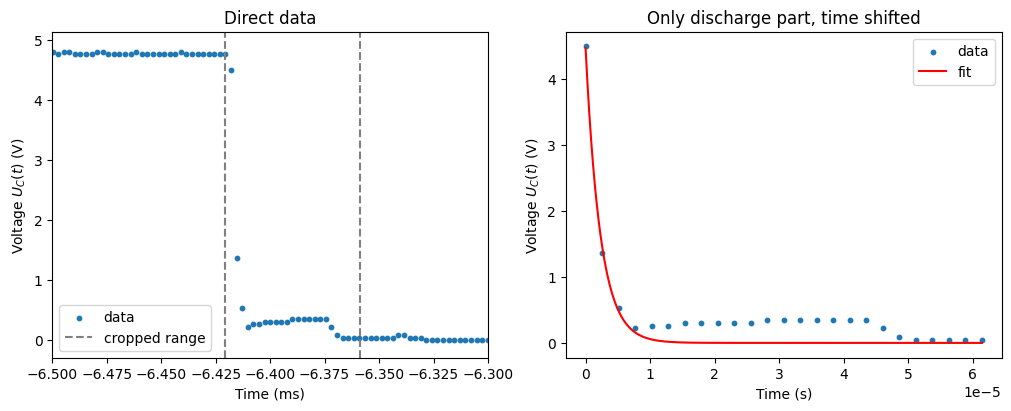

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(task1_10Ohm_time*1000, task1_10Ohm_volt, s = 10, label = 'data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Direct data')
plt.axvline(task1_10Ohm_time[task1_10Ohm_T0_index-1]*1000, ls = '--', c = 'gray')
plt.axvline((task1_10Ohm_time_cropped[-1] + task1_1kOhm_time[task1_10Ohm_T0_index-1])*1000, ls = '--', c = 'gray', label = 'cropped range')
plt.xlim(-0.0065*1000, -0.0063*1000)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Only discharge part, time shifted')
plt.scatter(task1_10Ohm_time_cropped, task1_10Ohm_volt_cropped, label = 'data', s = 10)
plt.plot(ts, task1_1(ts, popt1[0], popt1[1]), label = 'fit', c = 'r', zorder = 1)
plt.legend()

In [ ]:
task1_100Ohm_U_max = np.average(task1_100Ohm_volt[0:1000])
task1_100Ohm_T0_index = np.where(task1_100Ohm_volt <= task1_100Ohm_U_max - 0.3)[0][0]
task1_100Ohm_T0 = (task1_100Ohm_time[task1_100Ohm_T0_index])

task1_100Ohm_time_cropped = task1_100Ohm_time[task1_100Ohm_T0_index-1:task1_100Ohm_T0_index + 130] - task1_100Ohm_time[task1_100Ohm_T0_index-1]
task1_100Ohm_volt_cropped = task1_100Ohm_volt[task1_100Ohm_T0_index-1:task1_100Ohm_T0_index + 130]

ts2 = np.linspace(0, task1_100Ohm_time_cropped[-1], 10000)

In [ ]:
def task1_2(t, U, C):
  return U * np.exp(-t/(100*C))

popt2, pcov2 = curve_fit(task1_2, task1_100Ohm_time_cropped, task1_100Ohm_volt_cropped, p0 = [task1_100Ohm_U_max, 0.22*10**(-6)])
popt2

array([4.20799007e+00, 6.99205202e-07])

In [ ]:
task1_100Ohm_fit = task1_2(ts2, popt2[0], popt2[1])
task1_tau[1] = ts[np.where(task1_100Ohm_fit <= np.max(task1_100Ohm_fit)/np.e)[0][0]]
task1_tau[1]/100

1.2909834983498407e-07

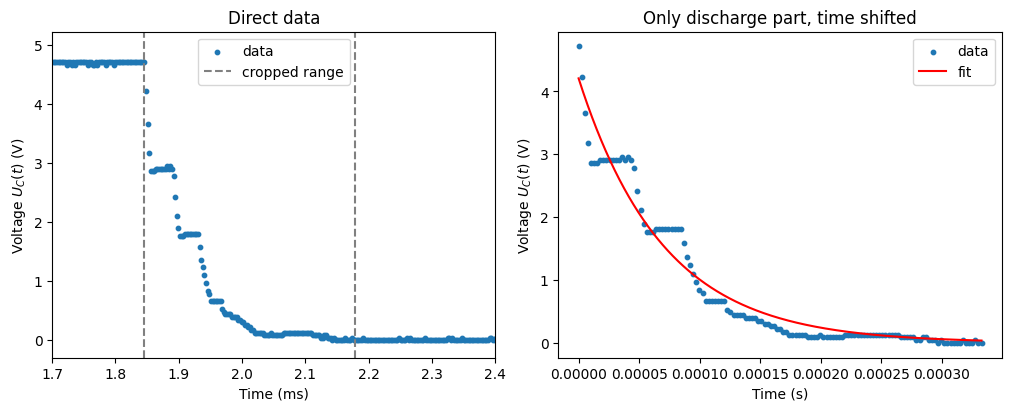

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(task1_100Ohm_time*1000, task1_100Ohm_volt, s = 10, label = 'data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Direct data')
plt.axvline(task1_100Ohm_time[task1_100Ohm_T0_index-1]*1000, ls = '--', c = 'gray')
plt.axvline((task1_100Ohm_time_cropped[-1] + task1_1kOhm_time[task1_100Ohm_T0_index-1])*1000, ls = '--', c = 'gray', label = 'cropped range')
plt.xlim(1.7, 2.4)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Only discharge part, time shifted')
plt.scatter(task1_100Ohm_time_cropped, task1_100Ohm_volt_cropped, label = 'data', s = 10)
plt.plot(ts2, task1_2(ts2, popt2[0], popt2[1]), label = 'fit', c = 'r', zorder = 1)
plt.legend()

In [ ]:
task1_1kOhm_U_max = np.average(task1_1kOhm_volt[0:1000])
task1_1kOhm_T0_index = np.where(task1_1kOhm_volt <= task1_1kOhm_U_max - 0.06)[0][0]
task1_1kOhm_T0 = (task1_1kOhm_time[task1_1kOhm_T0_index])

task1_1kOhm_time_cropped = task1_1kOhm_time[task1_1kOhm_T0_index:task1_1kOhm_T0_index + 600] - task1_1kOhm_time[task1_1kOhm_T0_index-1]
task1_1kOhm_volt_cropped = task1_1kOhm_volt[task1_1kOhm_T0_index:task1_1kOhm_T0_index + 600]

ts3 = np.linspace(0, task1_1kOhm_time_cropped[-1], 10000)

In [ ]:
def task1_3(t, U, C):
  return U * np.exp(-t/(1000*C))

popt3, pcov3 = curve_fit(task1_3, task1_1kOhm_time_cropped, task1_1kOhm_volt_cropped, p0 = [task1_1kOhm_U_max, 0.22*10**(-6)])
popt3

array([5.20748336e+00, 2.99448942e-07])

In [ ]:
task1_1kOhm_fit = task1_3(ts3, popt3[0], popt3[1])
task1_tau[2] = ts3[np.where(task1_1kOhm_fit <= np.max(task1_1kOhm_fit)/np.e)[0][0]]
task1_tau[2]/1000

2.9954995304530456e-07

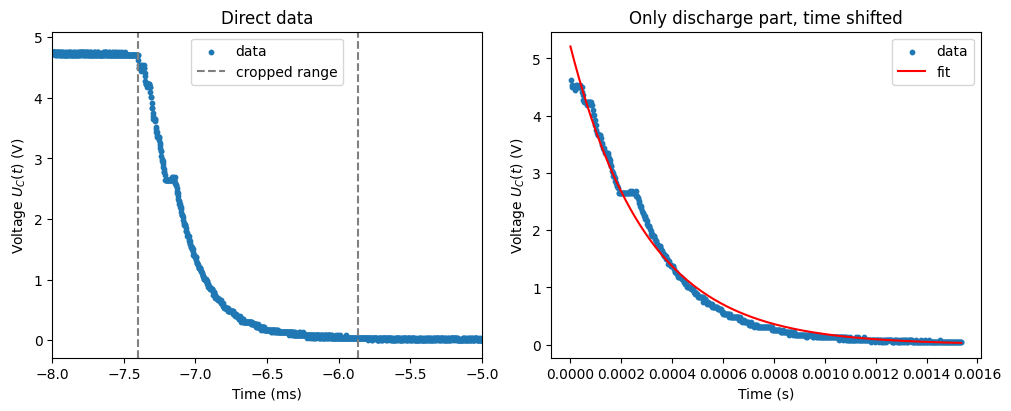

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(task1_1kOhm_time*1000, task1_1kOhm_volt, s = 10, label = 'data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Direct data')
plt.axvline(task1_1kOhm_time[task1_1kOhm_T0_index-1]*1000, ls = '--', c = 'gray')
plt.axvline((task1_1kOhm_time_cropped[-1] + task1_1kOhm_time[task1_1kOhm_T0_index-1])*1000, ls = '--', c = 'gray', label = 'cropped range')
plt.xlim(-8, -5)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Only discharge part, time shifted')
plt.scatter(task1_1kOhm_time_cropped, task1_1kOhm_volt_cropped, s = 10, label = 'data')
plt.plot(ts3, task1_3(ts3, popt3[0], popt3[1]), label = 'fit', c = 'r', zorder = 1)
plt.legend()

In [ ]:
task1_220Ohm_U_max = np.average(task1_220Ohm_volt[0:1000])
task1_220Ohm_T0_index = np.where(task1_220Ohm_volt <= task1_220Ohm_U_max - 0.18)[0][0]
task1_220Ohm_T0 = (task1_220Ohm_time[task1_220Ohm_T0_index])

task1_220Ohm_time_cropped = task1_220Ohm_time[task1_220Ohm_T0_index-1:task1_220Ohm_T0_index + 200] - task1_220Ohm_time[task1_220Ohm_T0_index]
task1_220Ohm_volt_cropped = task1_220Ohm_volt[task1_220Ohm_T0_index-1:task1_220Ohm_T0_index + 200]

ts4 = np.linspace(0, task1_220Ohm_time_cropped[-1], 10000)

In [ ]:
def task1_4(t, U, C):
  return U * np.exp(-t/(220*C))

popt4, pcov4 = curve_fit(task1_4, task1_220Ohm_time_cropped, task1_220Ohm_volt_cropped, p0 = [task1_220Ohm_U_max, 0.22*10**(-6)])
popt4

array([4.87108691e+00, 4.83600264e-07])

In [ ]:
task1_220Ohm_fit = task1_4(ts4, popt4[0], popt4[1])
task1_tau[3] = ts4[np.where(task1_220Ohm_fit <= np.max(task1_220Ohm_fit)/np.e)[0][0]]
task1_tau[3]/task1_R[3]

4.837848148451216e-07

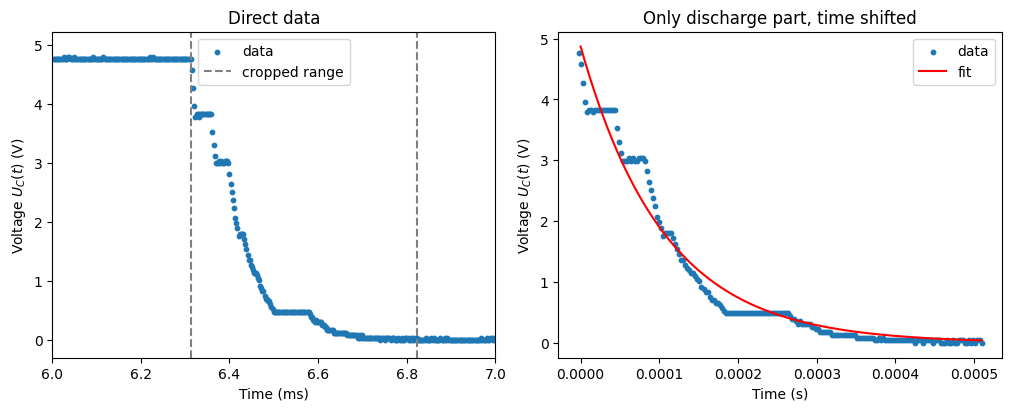

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(task1_220Ohm_time*1000, task1_220Ohm_volt, s = 10, label = 'data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Direct data')
plt.axvline(task1_220Ohm_time[task1_220Ohm_T0_index-1]*1000, ls = '--', c = 'gray')
plt.axvline((task1_220Ohm_time_cropped[-1] + task1_220Ohm_time[task1_220Ohm_T0_index-1])*1000, ls = '--', c = 'gray', label = 'cropped range')
plt.xlim(6, 7)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Only discharge part, time shifted')
plt.scatter(task1_220Ohm_time_cropped, task1_220Ohm_volt_cropped, label = 'data', s = 10)
plt.plot(ts4, task1_4(ts4, popt4[0], popt4[1]), label = 'fit', c = 'r', zorder = 1)
plt.legend()

In [ ]:
task1_320Ohm_U_max = np.average(task1_320Ohm_volt[0:1000])
task1_320Ohm_T0_index = np.where(task1_320Ohm_volt <= task1_320Ohm_U_max - 0.25)[0][0]
task1_320Ohm_T0 = (task1_320Ohm_time[task1_320Ohm_T0_index])

task1_320Ohm_time_cropped = task1_320Ohm_time[task1_320Ohm_T0_index-1:task1_320Ohm_T0_index + 230] - task1_320Ohm_time[task1_320Ohm_T0_index]
task1_320Ohm_volt_cropped = task1_320Ohm_volt[task1_320Ohm_T0_index-1:task1_320Ohm_T0_index + 230]

ts5 = np.linspace(0, task1_320Ohm_time_cropped[-1], 10000)

In [ ]:
def task1_5(t, U, C):
  return U * np.exp(-t/(320*C))

popt5, pcov5 = curve_fit(task1_5, task1_320Ohm_time_cropped, task1_320Ohm_volt_cropped, p0 = [task1_320Ohm_U_max, 0.22*10**(-6)])
popt5

array([4.92426121e+00, 4.25230067e-07])

In [ ]:
task1_320Ohm_fit = task1_5(ts5, popt5[0], popt5[1])
task1_tau[4] = ts5[np.where(task1_320Ohm_fit <= np.max(task1_320Ohm_fit)/np.e)[0][0]]
task1_tau[4]/task1_R[4]

4.252497249724973e-07

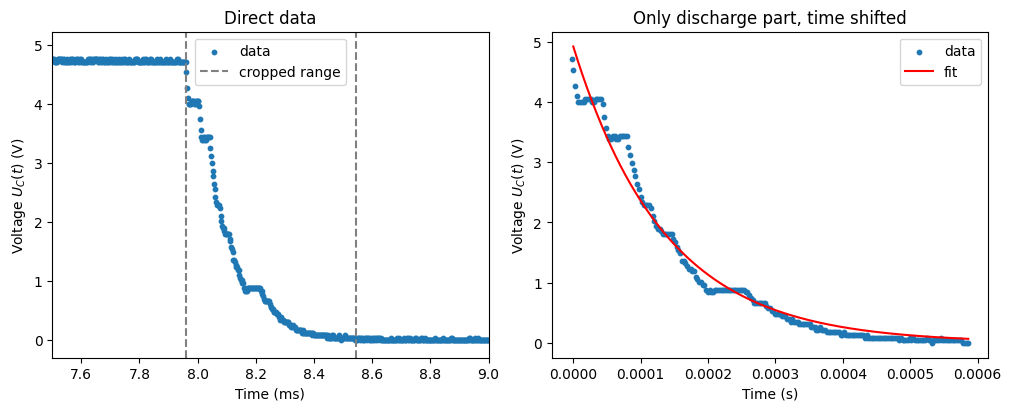

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(task1_320Ohm_time*1000, task1_320Ohm_volt, s = 10, label = 'data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Direct data')
plt.axvline(task1_320Ohm_time[task1_320Ohm_T0_index-1]*1000, ls = '--', c = 'gray')
plt.axvline((task1_320Ohm_time_cropped[-1] + task1_320Ohm_time[task1_320Ohm_T0_index-1])*1000, ls = '--', c = 'gray', label = 'cropped range')
plt.xlim(7.5, 9)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Only discharge part, time shifted')
plt.scatter(task1_320Ohm_time_cropped, task1_320Ohm_volt_cropped, label = 'data', s = 10)
plt.plot(ts5, task1_5(ts5, popt5[0], popt5[1]), label = 'fit', c = 'r', zorder = +1)
plt.legend()

In [ ]:
task1_10kOhm_U_max = np.average(task1_10kOhm_volt[0:1000])
task1_10kOhm_T0_index = np.where(task1_10kOhm_volt <= task1_10kOhm_U_max - 0.25)[0][0]
task1_10kOhm_T0 = (task1_10kOhm_time[task1_10kOhm_T0_index])

task1_10kOhm_time_cropped = task1_10kOhm_time[task1_10kOhm_T0_index-1:task1_10kOhm_T0_index + 350] - task1_10kOhm_time[task1_10kOhm_T0_index-1]
task1_10kOhm_volt_cropped = task1_10kOhm_volt[task1_10kOhm_T0_index-1:task1_10kOhm_T0_index + 350]

ts6 = np.linspace(0, task1_10kOhm_time_cropped[-1], 10000)

In [ ]:
def task1_6(t, U, C):
  return U * np.exp(-t/(10000*C))

popt6, pcov6 = curve_fit(task1_6, task1_10kOhm_time_cropped, task1_10kOhm_volt_cropped, p0 = [task1_10kOhm_U_max, 0.22*10**(-6)])
popt6

array([4.64888944e+00, 2.18556933e-07])

In [ ]:
task1_10kOhm_fit = task1_6(ts6, popt6[0], popt6[1])
task1_tau[5] = ts6[np.where(task1_10kOhm_fit <= np.max(task1_10kOhm_fit)/np.e)[0][0]]
task1_tau[5]/task1_R[5]

2.1864586321382128e-07

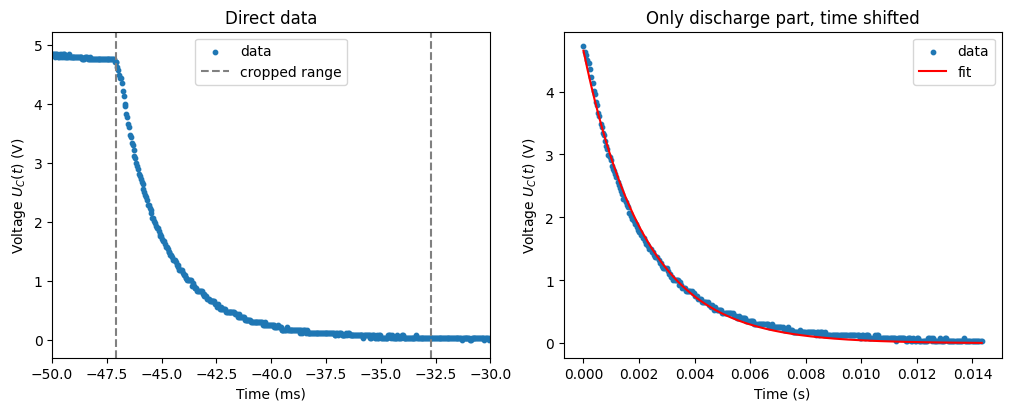

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(task1_10kOhm_time*1000, task1_10kOhm_volt, s = 10, label = 'data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Direct data')
plt.axvline(task1_10kOhm_time[task1_10kOhm_T0_index-1]*1000, ls = '--', c = 'gray')
plt.axvline((task1_10kOhm_time_cropped[-1] + task1_10kOhm_time[task1_10kOhm_T0_index-1])*1000, ls = '--', c = 'gray', label = 'cropped range')
plt.xlim(-50, -30)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Only discharge part, time shifted')
plt.scatter(task1_10kOhm_time_cropped, task1_10kOhm_volt_cropped, label = 'data', s = 10)
plt.plot(ts6, task1_6(ts6, popt6[0], popt6[1]), label = 'fit', c = 'r', zorder = +1)
plt.legend()

In [ ]:
task1_22kOhm_U_max = np.average(task1_22kOhm_volt[0:1000])
task1_22kOhm_T0_index = np.where(task1_22kOhm_volt <= task1_22kOhm_U_max - 0.24)[0][0]
task1_22kOhm_T0 = (task1_22kOhm_time[task1_22kOhm_T0_index])

task1_22kOhm_time_cropped = task1_22kOhm_time[task1_22kOhm_T0_index-1:task1_22kOhm_T0_index + 650] - task1_22kOhm_time[task1_22kOhm_T0_index-1]
task1_22kOhm_volt_cropped = task1_22kOhm_volt[task1_22kOhm_T0_index-1:task1_22kOhm_T0_index + 650]

ts7 = np.linspace(0, task1_22kOhm_time_cropped[-1], 10000)

In [ ]:
def task1_7(t, U, C):
  return U * np.exp(-t/(22000*C))

popt7, pcov7 = curve_fit(task1_7, task1_22kOhm_time_cropped, task1_22kOhm_volt_cropped, p0 = [task1_22kOhm_U_max, 0.22*10**(-6)])
popt7

array([4.50132948e+00, 2.17574202e-07])

In [ ]:
task1_22kOhm_fit = task1_7(ts7, popt7[0], popt7[1])
task1_tau[6] = ts7[np.where(task1_22kOhm_fit <= np.max(task1_22kOhm_fit)/np.e)[0][0]]
task1_tau[6]/task1_R[6]

2.176124508465392e-07

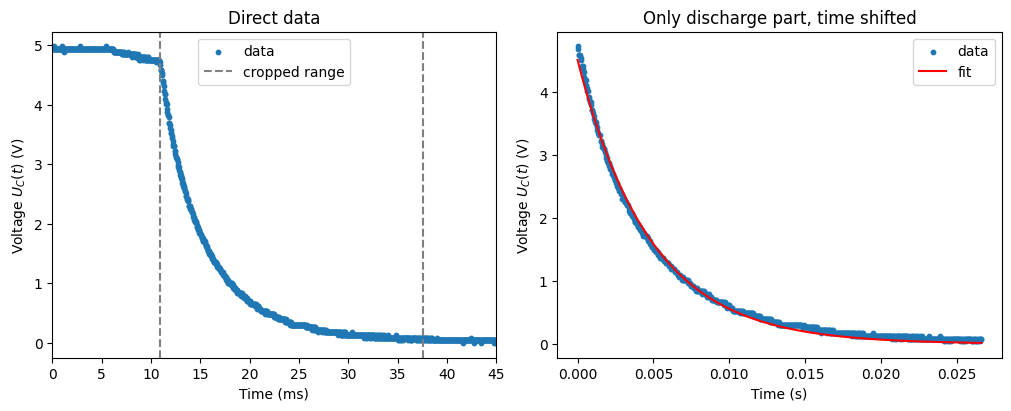

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(task1_22kOhm_time*1000, task1_22kOhm_volt, s = 10, label = 'data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Direct data')
plt.axvline(task1_22kOhm_time[task1_22kOhm_T0_index-1]*1000, ls = '--', c = 'gray')
plt.axvline((task1_22kOhm_time_cropped[-1] + task1_22kOhm_time[task1_22kOhm_T0_index-1])*1000, ls = '--', c = 'gray', label = 'cropped range')
plt.xlim(0, 45)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Only discharge part, time shifted')
plt.scatter(task1_22kOhm_time_cropped, task1_22kOhm_volt_cropped, label = 'data', s = 10)
plt.plot(ts7, task1_7(ts7, popt7[0], popt7[1]), label = 'fit', c = 'r', zorder = +1)
plt.legend()

In [ ]:
task1_32kOhm_U_max = np.average(task1_32kOhm_volt[0:1000])
task1_32kOhm_T0_index = np.where(task1_32kOhm_volt <= task1_32kOhm_U_max - 0.24)[0][0]
task1_32kOhm_T0 = (task1_32kOhm_time[task1_32kOhm_T0_index])

task1_32kOhm_time_cropped = task1_32kOhm_time[task1_32kOhm_T0_index-1:task1_32kOhm_T0_index + 900] - task1_32kOhm_time[task1_32kOhm_T0_index]
task1_32kOhm_volt_cropped = task1_32kOhm_volt[task1_32kOhm_T0_index-1:task1_32kOhm_T0_index + 900]

ts8 = np.linspace(0, task1_32kOhm_time_cropped[-1], 10000)

In [ ]:
def task1_8(t, U, C):
  return U * np.exp(-t/(32000*C))

popt8, pcov8 = curve_fit(task1_8, task1_32kOhm_time_cropped, task1_32kOhm_volt_cropped, p0 = [task1_32kOhm_U_max, 0.22*10**(-6)])
popt8

array([4.42783311e+00, 2.20216400e-07])

In [ ]:
task1_32kOhm_fit = task1_8(ts8, popt8[0], popt8[1])
task1_tau[7] = ts8[np.where(task1_32kOhm_fit <= np.max(task1_32kOhm_fit)/np.e)[0][0]]
task1_tau[7]/task1_R[7]

2.2026983360767324e-07

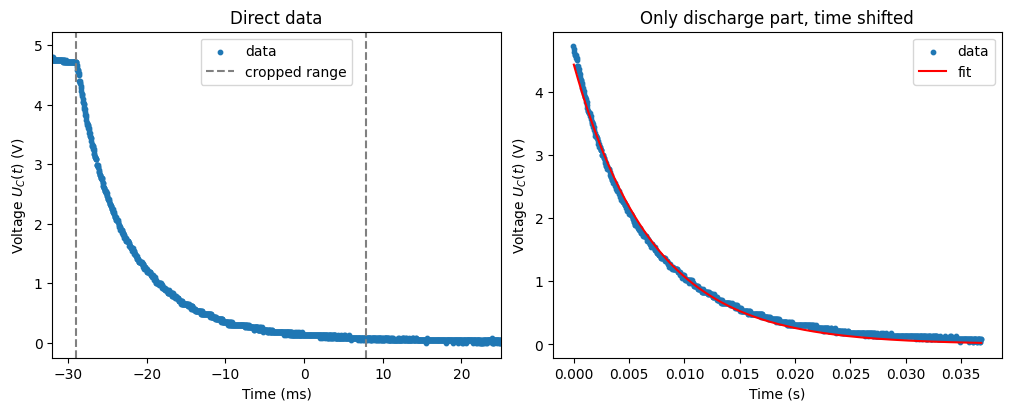

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(task1_32kOhm_time*1000, task1_32kOhm_volt, s = 10, label = 'data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Direct data')
plt.axvline(task1_32kOhm_time[task1_32kOhm_T0_index-1]*1000, ls = '--', c = 'gray')
plt.axvline((task1_32kOhm_time_cropped[-1] + task1_32kOhm_time[task1_32kOhm_T0_index-1])*1000, ls = '--', c = 'gray', label = 'cropped range')
plt.xlim(-32, 25)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Only discharge part, time shifted')
plt.scatter(task1_32kOhm_time_cropped, task1_32kOhm_volt_cropped, label = 'data', s = 10)
plt.plot(ts8, task1_8(ts8, popt8[0], popt8[1]), label = 'fit', c = 'r', zorder = +1)

plt.legend()

In [ ]:
task1_44kOhm_U_max = np.average(task1_44kOhm_volt[0:1000])
task1_44kOhm_T0_index = np.where(task1_44kOhm_volt <= task1_44kOhm_U_max - 0.24)[0][0]
task1_44kOhm_T0 = (task1_44kOhm_time[task1_44kOhm_T0_index])

task1_44kOhm_time_cropped = task1_44kOhm_time[task1_44kOhm_T0_index-1:task1_44kOhm_T0_index + 900] - task1_44kOhm_time[task1_44kOhm_T0_index-1]
task1_44kOhm_volt_cropped = task1_44kOhm_volt[task1_44kOhm_T0_index-1:task1_44kOhm_T0_index + 900]

ts9 = np.linspace(0, task1_44kOhm_time_cropped[-1], 10000)

In [ ]:
def task1_9(t, U, C):
  return U * np.exp(-t/(44000*C))

popt9, pcov9 = curve_fit(task1_9, task1_44kOhm_time_cropped, task1_44kOhm_volt_cropped, p0 = [task1_44kOhm_U_max, 0.22*10**(-6)])
popt9

array([4.40944132e+00, 2.24580961e-07])

In [ ]:
task1_44kOhm_fit = task1_9(ts9, popt9[0], popt9[1])
task1_tau[8] = ts9[np.where(task1_44kOhm_fit <= np.max(task1_44kOhm_fit)/np.e)[0][0]]
task1_tau[8]/task1_R[8]

2.2472530752291142e-07

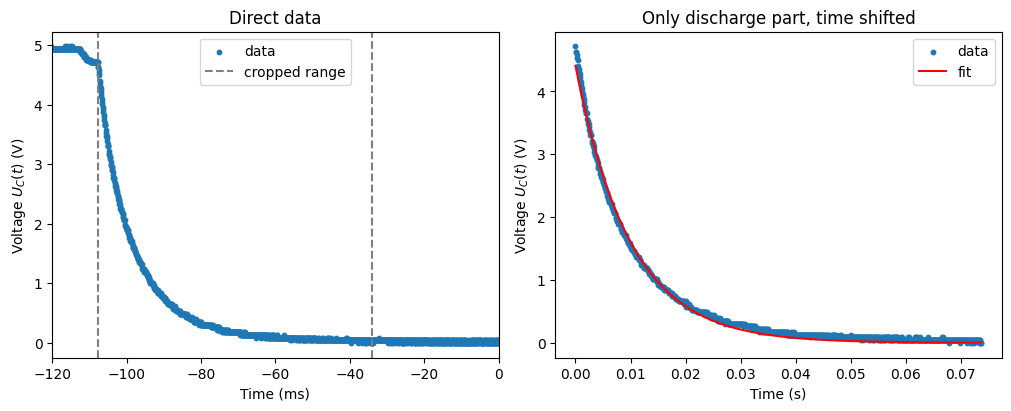

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(task1_44kOhm_time*1000, task1_44kOhm_volt, s = 10, label = 'data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Direct data')
plt.axvline(task1_44kOhm_time[task1_44kOhm_T0_index-1]*1000, ls = '--', c = 'gray')
plt.axvline((task1_44kOhm_time_cropped[-1] + task1_44kOhm_time[task1_44kOhm_T0_index-1])*1000, ls = '--', c = 'gray', label = 'cropped range')
plt.xlim(-120, 0)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Only discharge part, time shifted')
plt.scatter(task1_44kOhm_time_cropped, task1_44kOhm_volt_cropped, label = 'data', s = 10)
plt.plot(ts9, task1_9(ts9, popt9[0], popt9[1]), label = 'fit', c = 'r', zorder = +1)
plt.legend()

In [ ]:
task1_6875Ohm_U_max = np.average(task1_6875Ohm_volt[0:1000])
task1_6875Ohm_T0_index = np.where(task1_6875Ohm_volt <= task1_6875Ohm_U_max - 0.24)[0][0]
task1_6875Ohm_T0 = (task1_6875Ohm_time[task1_6875Ohm_T0_index])

task1_6875Ohm_time_cropped = task1_6875Ohm_time[task1_6875Ohm_T0_index-1:task1_6875Ohm_T0_index + 250] - task1_6875Ohm_time[task1_6875Ohm_T0_index-1]
task1_6875Ohm_volt_cropped = task1_6875Ohm_volt[task1_6875Ohm_T0_index-1:task1_6875Ohm_T0_index + 250]

ts10 = np.linspace(0, task1_6875Ohm_time_cropped[-1], 10000)

In [ ]:
def task1_10(t, U, C):
  return U * np.exp(-t/(44000*C))

popt10, pcov10 = curve_fit(task1_10, task1_6875Ohm_time_cropped, task1_6875Ohm_volt_cropped, p0 = [task1_6875Ohm_U_max, 0.22*10**(-6)])
popt10

array([4.80785519e+00, 3.45212651e-08])

In [ ]:
task1_6875Ohm_fit = task1_10(ts10, popt10[0], popt10[1])
task1_tau[9] = ts10[np.where(task1_6875Ohm_fit <= np.max(task1_6875Ohm_fit)/np.e)[0][0]]
task1_tau[9]/task1_R[9]

2.21057158966224e-07

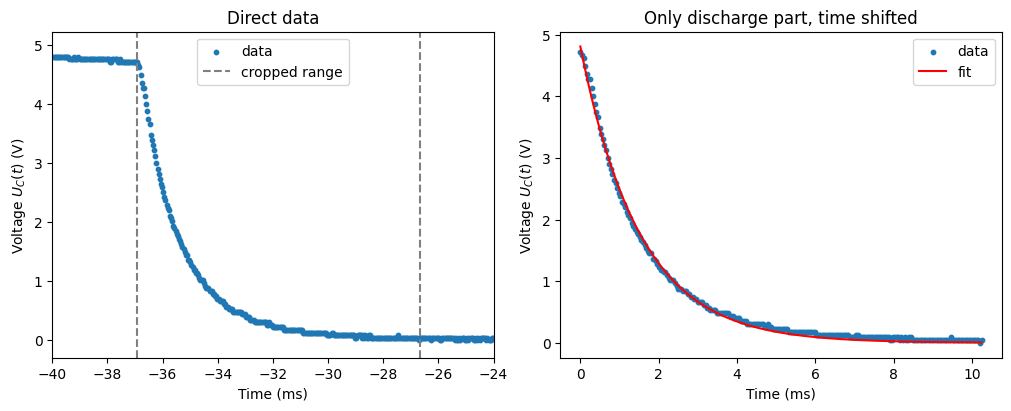

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(task1_6875Ohm_time*1000, task1_6875Ohm_volt, s = 10, label = 'data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Direct data')
plt.axvline(task1_6875Ohm_time[task1_6875Ohm_T0_index-1]*1000, ls = '--', c = 'gray')
plt.axvline((task1_6875Ohm_time_cropped[-1] + task1_6875Ohm_time[task1_6875Ohm_T0_index-1])*1000, ls = '--', c = 'gray', label = 'cropped range')
plt.xlim(-0.04*1000, -0.024*1000)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('Only discharge part, time shifted')
plt.scatter(task1_6875Ohm_time_cropped*1000, task1_6875Ohm_volt_cropped, label = 'data', s = 10)
plt.plot(ts10*1000, task1_10(ts10, popt10[0], popt10[1]), label = 'fit', c = 'r', zorder = +1)
plt.legend()

plt.savefig('task1_6875Ohm.png')

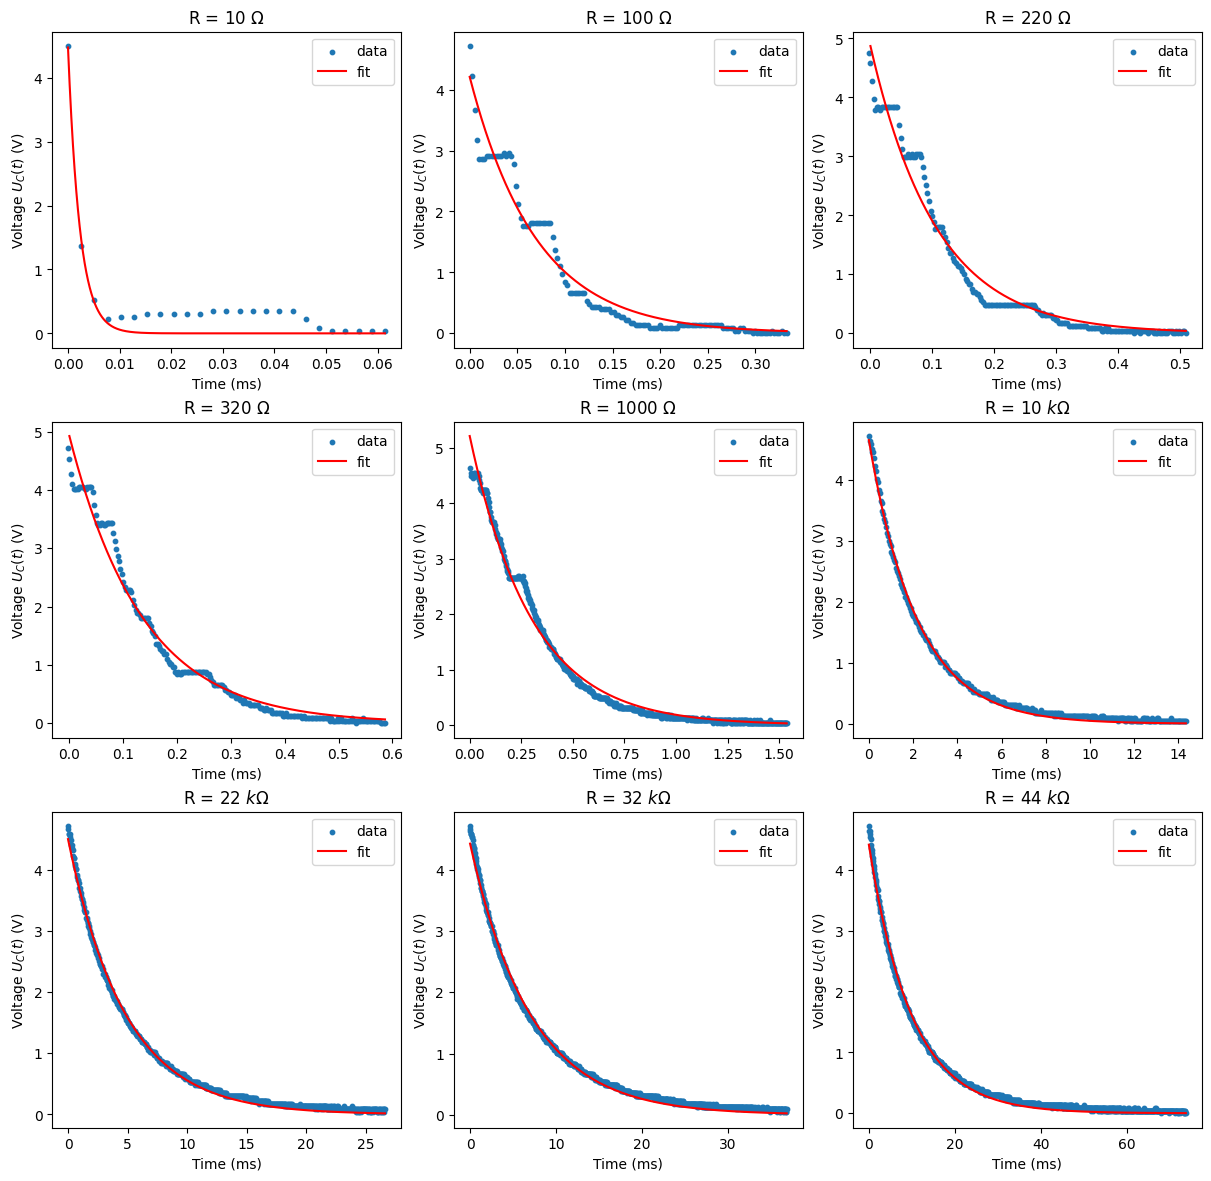

In [ ]:
fig = plt.figure(layout='constrained', figsize=(12, 11.7))

plt.subplot(3, 3, 1)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('R = 10 $\Omega$')
plt.scatter(task1_10Ohm_time_cropped*1000, task1_10Ohm_volt_cropped, label = 'data', s = 10)
plt.plot(ts*1000, task1_1(ts, popt1[0], popt1[1]), label = 'fit', c = 'r', zorder = 1)
plt.legend()

plt.subplot(3, 3, 2)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('R = 100 $\Omega$')
plt.scatter(task1_100Ohm_time_cropped*1000, task1_100Ohm_volt_cropped, label = 'data', s = 10)
plt.plot(ts2*1000, task1_2(ts2, popt2[0], popt2[1]), label = 'fit', c = 'r', zorder = 1)
plt.legend()

plt.subplot(3, 3, 3)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('R = 220 $\Omega$')
plt.scatter(task1_220Ohm_time_cropped*1000, task1_220Ohm_volt_cropped, label = 'data', s = 10)
plt.plot(ts4*1000, task1_4(ts4, popt4[0], popt4[1]), label = 'fit', c = 'r', zorder = 1)
plt.legend()

plt.subplot(3, 3, 4)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('R = 320 $\Omega$')
plt.scatter(task1_320Ohm_time_cropped*1000, task1_320Ohm_volt_cropped, label = 'data', s = 10)
plt.plot(ts5*1000, task1_5(ts5, popt5[0], popt5[1]), label = 'fit', c = 'r', zorder = +1)
plt.legend()

plt.subplot(3, 3, 5)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('R = 1000 $\Omega$')
plt.scatter(task1_1kOhm_time_cropped*1000, task1_1kOhm_volt_cropped, s = 10, label = 'data')
plt.plot(ts3*1000, task1_3(ts3, popt3[0], popt3[1]), label = 'fit', c = 'r', zorder = 1)
plt.legend()

plt.subplot(3, 3, 6)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('R = 10 $k\Omega$')
plt.scatter(task1_10kOhm_time_cropped*1000, task1_10kOhm_volt_cropped, s = 10, label = 'data')
plt.plot(ts6*1000, task1_6(ts6, popt6[0], popt6[1]), label = 'fit', c = 'r', zorder = 1)
plt.legend()

plt.subplot(3, 3, 7)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('R = 22 $k\Omega$')
plt.scatter(task1_22kOhm_time_cropped*1000, task1_22kOhm_volt_cropped, label = 'data', s = 10)
plt.plot(ts7*1000, task1_7(ts7, popt7[0], popt7[1]), label = 'fit', c = 'r', zorder = +1)
plt.legend()

plt.subplot(3, 3, 8)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('R = 32 $k\Omega$')
plt.scatter(task1_32kOhm_time_cropped*1000, task1_32kOhm_volt_cropped, label = 'data', s = 10)
plt.plot(ts8*1000, task1_8(ts8, popt8[0], popt8[1]), label = 'fit', c = 'r', zorder = +1)
plt.legend()

plt.subplot(3, 3, 9)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C(t)$ (V)')
plt.title('R = 44 $k\Omega$')
plt.scatter(task1_44kOhm_time_cropped*1000, task1_44kOhm_volt_cropped, label = 'data', s = 10)
plt.plot(ts9*1000, task1_9(ts9, popt9[0], popt9[1]), label = 'fit', c = 'r', zorder = +1)
plt.legend()

plt.savefig('task1_other_res.png')

In [ ]:
def task1_lin(R, C):
  return R*C

popttau, pcovtau = curve_fit(task1_lin, task1_R, task1_tau, p0 = [2.2*10**(-7)])
task1_C = popttau[0]
task1_C_err = np.sqrt(pcovtau[0][0])
task1_C, task1_C_err

(2.223092779934879e-07, 1.1292903437444663e-09)

In [ ]:
R_smooth = np.linspace(0,44000,10000)
task1_R, task1_tau

(array([   10,   100,  1000,   220,   320, 10000, 22000, 32000, 44000,
         6875]),
 array([2.30423042e-06, 1.29098350e-05, 2.99549953e-04, 1.06432659e-04,
        1.36079912e-04, 2.18645863e-03, 4.78747392e-03, 7.04863468e-03,
        9.88791353e-03, 1.51976797e-03]))

In [ ]:
popt1[0], popt2[0], popt3[0], popt4[0], popt5[0], popt6[0], popt7[0], popt8[0],popt9[0],popt10[0]

(4.471521561420778,
 4.207990065441746,
 5.207483360254,
 4.871086909510233,
 4.924261211858166,
 4.648889436505222,
 4.501329480076186,
 4.427833111264599,
 4.409441323084372,
 4.807855186468282)

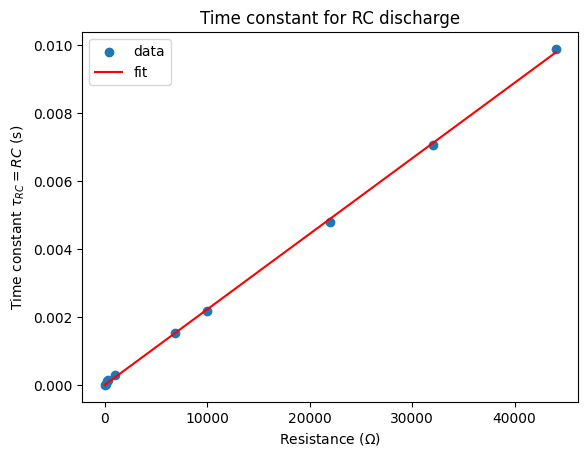

In [ ]:
plt.title('Time constant for RC discharge')
plt.scatter(task1_R, task1_tau, label = 'data')
plt.plot(R_smooth, task1_lin(R_smooth, popttau[0]), label = 'fit', c = 'r')
plt.xlabel(r'Resistance ($\Omega$)')
plt.ylabel(r'Time constant $\tau_{RC} = RC$ (s)')
plt.legend()
plt.savefig('task1_tau.png')

# Task 2

In [ ]:
task2_T0_index = np.where(task2_1kOhm_volt == np.max(task2_1kOhm_volt))[0][0]
task2_time_cropped = task2_1kOhm_time[task2_T0_index:task2_T0_index+30] - task2_1kOhm_time[task2_T0_index]
task2_volt_cropped = task2_1kOhm_volt[task2_T0_index:task2_T0_index+30]
task2_capvolt = 5 - task2_volt_cropped

t2 = np.linspace(0, task2_time_cropped[-1], 1000)

In [ ]:
def task2(t, U, tau):
  return U*(1 - np.exp(-t/(tau)))

In [ ]:
popt11, pcov11 = curve_fit(task2, task2_time_cropped, task2_capvolt, p0 = [3, 1000])
popt11, np.sqrt(pcov11[0][0])

(array([4.99382625e+00, 2.27355153e-04]), 0.06352898234221711)

In [ ]:
task2_tau = popt11[1]
task2_tau_err = np.sqrt(pcov11[1][1])
task2_R = task2_tau/task1_C
task2_R_err = task2_R*np.sqrt((task2_tau_err/task2_tau)**2 + (task1_C_err/task1_C)**2)
task2_tau, task2_tau_err, task2_R, task2_R_err

(0.00022735515292959463,
 1.748733496598207e-05,
 1022.6975454270269,
 78.83355616875565)

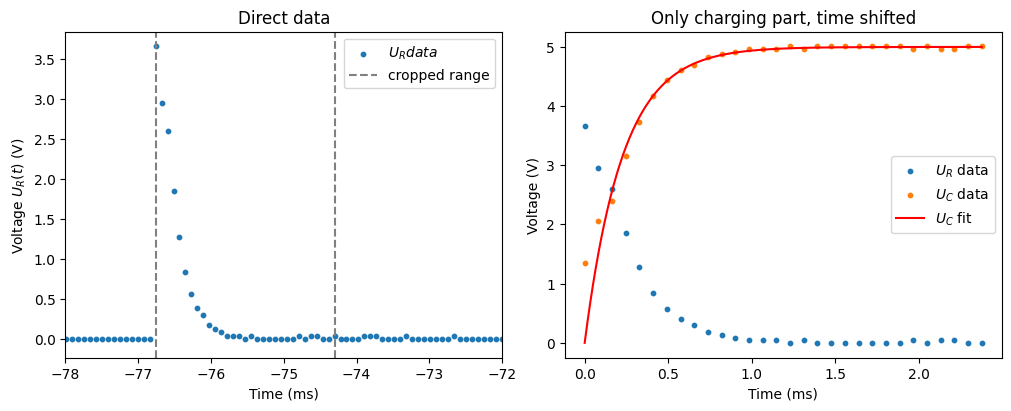

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(task2_1kOhm_time*1000, task2_1kOhm_volt, s = 10, label = '$U_R data$')
plt.xlim(-0.078*1000,-0.072*1000)
plt.axvline(task2_1kOhm_time[task2_T0_index]*1000, ls = '--', c = 'gray')
plt.axvline(task2_1kOhm_time[task2_T0_index + np.size(task2_time_cropped)]*1000, ls = '--', c = 'gray', label = 'cropped range')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_R(t)$ (V)')
plt.title('Direct data')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('Only charging part, time shifted')
plt.scatter(task2_time_cropped*1000, task2_volt_cropped, label = '$U_R$ data', s = 10)
plt.scatter(task2_time_cropped*1000, task2_capvolt, label = '$U_C$ data', s = 10)
plt.plot(t2*1000, task2(t2, popt11[0], popt11[1]), label = '$U_C$ fit', c = 'r', zorder = +1)
plt.legend()

plt.savefig('task2_plots.png')

# Task 3

In [ ]:
task3_100Ohm_T0_index = np.where(task3_100Ohm_time > 0)[0][0] + 7
task3_100Ohm_T0 = task3_100Ohm_time[task3_100Ohm_T0_index]

task3_100Ohm_time_cropped = task3_100Ohm_time[task3_100Ohm_T0_index:task3_100Ohm_T0_index + 45] - task3_100Ohm_time[task3_100Ohm_T0_index]
task3_100Ohm_volt_cropped = task3_100Ohm_volt[task3_100Ohm_T0_index:task3_100Ohm_T0_index + 45]
task3_100Ohm_indvolt_cropped = np.max(task3_100Ohm_volt_cropped) - task3_100Ohm_volt_cropped

t3 = np.linspace(0, task3_100Ohm_time_cropped[-1], 10000)

R1, R2 = 100, 200

In [ ]:
task3_200Ohm_T0_index = np.where(task3_200Ohm_time > 0.000225)[0][0] + 10
task3_200Ohm_T0 = task3_200Ohm_time[task3_200Ohm_T0_index]

task3_200Ohm_time_cropped = task3_200Ohm_time[task3_200Ohm_T0_index:task3_200Ohm_T0_index + 90] - task3_200Ohm_time[task3_200Ohm_T0_index]
task3_200Ohm_volt_cropped = task3_200Ohm_volt[task3_200Ohm_T0_index:task3_200Ohm_T0_index + 90]
task3_200Ohm_indvolt_cropped = np.max(task3_200Ohm_volt_cropped) - task3_200Ohm_volt_cropped

t33 = np.linspace(0, task3_200Ohm_time_cropped[-1], 20000)

In [ ]:
def task3_1(t, U, L, r):
  return U*(1 - R1/(R1 + r)*(1 - np.exp(-(R1 + r)/L * t)))

In [ ]:
popt12, pcov12 = curve_fit(task3_1, task3_100Ohm_time_cropped, task3_100Ohm_indvolt_cropped, p0 = [5, 1.5*10**(-3), 5])
popt12

array([ 4.74815420e+00,  1.61667570e-03, -5.18371478e-01])

In [ ]:
task3_100Ohm_fit = task3_1(t3, popt12[0], popt12[1], popt12[2])
task3_tau1 = t3[np.where(task3_100Ohm_fit <= np.max(task3_100Ohm_fit)*(1-R1/(R1 + popt12[2])*(1 - 1/np.e)))[0][0]]
task1_L1 = task3_tau1*(R1 + popt12[2])

In [ ]:
def task3_2(t, U, L, r):
  return U*(1 - R2/(R2 + r)*(1 - np.exp(-(R2 + r)/L * t)))

In [ ]:
popt13, pcov13 = curve_fit(task3_2, task3_200Ohm_time_cropped, task3_200Ohm_indvolt_cropped, p0 = [5, 1.5*10**(-3), 5])
popt13

array([4.63797679e+00, 1.54958186e-03, 2.12722311e+00])

In [ ]:
task3_200Ohm_fit = task3_2(t33, popt13[0], popt13[1], popt13[2])
task3_tau2 = t33[np.where(task3_200Ohm_fit <= np.max(task3_200Ohm_fit)*(1 - R2/(R2 + popt13[2])*(1 - 1/np.e)))[0][0]]
task1_L2 = task3_tau2*(R2 + popt13[2])

In [ ]:
task3_L = (task1_L1 + task1_L2)/2
task1_L1, task1_L2, task3_L

(0.001617131328005992, 0.0015497497156242808, 0.0015834405218151364)

In [ ]:
task3_L_err = np.sqrt(pcov12[1][1] + pcov13[1][1])
task3_L_err

2.2321388780103036e-05

In [ ]:
task1_tau1_err = np.sqrt(pcov12[1][1])
task1_tau2_err = np.sqrt(pcov13[1][1])
task1_tau1_err, task1_tau2_err

(1.959032365565196e-05, 1.0698767038276561e-05)

In [ ]:
task3_tau1, task3_tau2

(1.6255577557755777e-05, 7.667199359967999e-06)

In [ ]:
r1, r2 = popt12[2], popt13[2]
r = (r2+r1)/2
r1_err, r2_err = np.sqrt(pcov12[2][2]), np.sqrt(pcov13[2][2])
r1, r1_err, r2, r2_err, r

(-0.5183714783216378,
 0.22572335961620377,
 2.1272231051977224,
 0.23598748144864892,
 0.8044258134380423)

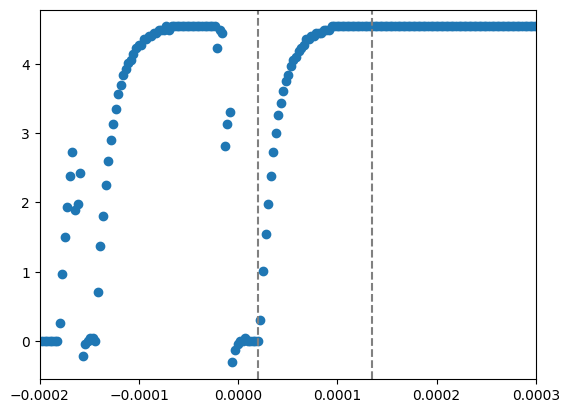

In [ ]:
plt.scatter(task3_100Ohm_time, task3_100Ohm_volt)
plt.xlim(-0.0002, 0.0003)
plt.axvline(task3_100Ohm_T0, ls = '--', c = 'gray')
plt.axvline(task3_100Ohm_time[task3_100Ohm_T0_index + np.size(task3_100Ohm_time_cropped)], ls = '--', c = 'gray', label = 'cropped range')

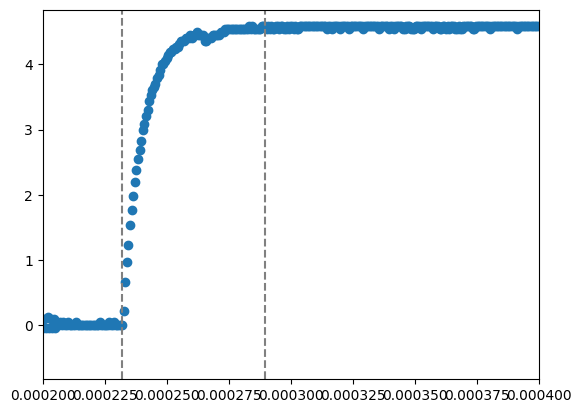

In [ ]:
plt.scatter(task3_200Ohm_time, task3_200Ohm_volt)
plt.xlim(0.0002, 0.0004)
plt.axvline(task3_200Ohm_T0, ls = '--', c = 'gray')
plt.axvline(task3_200Ohm_time[task3_200Ohm_T0_index + np.size(task3_200Ohm_time_cropped)], ls = '--', c = 'gray', label = 'cropped range')

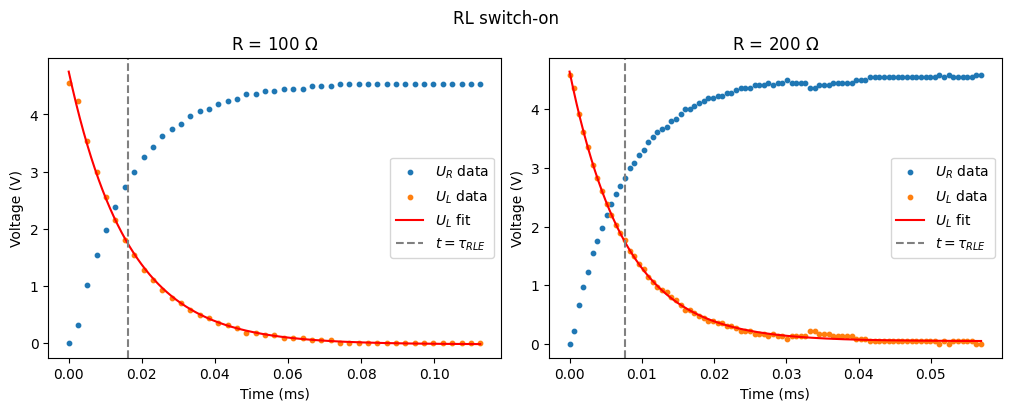

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 4))
fig.suptitle('RL switch-on')

plt.subplot(1, 2, 1)

plt.scatter(task3_100Ohm_time_cropped*1000, task3_100Ohm_volt_cropped, s = 10, label = '$U_R$ data')
plt.scatter(task3_100Ohm_time_cropped*1000, task3_100Ohm_indvolt_cropped, s = 10, label = '$U_L$ data')
plt.plot(t3*1000, task3_1(t3, popt12[0], popt12[1], popt12[2]), c = 'r', label = '$U_L$ fit')
plt.axvline(task3_tau1*1000, ls = '--', c = 'gray', label = r'$t = \tau_{RLE}$')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('R = 100 $\Omega$')
plt.legend()

plt.subplot(1, 2, 2)

plt.scatter(task3_200Ohm_time_cropped*1000, task3_200Ohm_volt_cropped, s = 10, label = '$U_R$ data')
plt.scatter(task3_200Ohm_time_cropped*1000, task3_200Ohm_indvolt_cropped, s = 10, label = '$U_L$ data')
plt.plot(t33*1000, task3_2(t33, popt13[0], popt13[1], popt13[2]), c = 'r', label = '$U_L$ fit')
plt.axvline(task3_tau2*1000, ls = '--', c = 'gray', label = r'$t = \tau_{RLE}$')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('R = 200 $\Omega$')
plt.legend()

plt.savefig('task3_plots.png')

# Task 4